In [104]:
# https://github.com/robotautas/kursas/blob/master/Machine%20Learning/linear_regression__uzduotis.ipynb
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [105]:
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [106]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [107]:
# fish.columns
origins = pd.get_dummies(fish['Species'])
origins

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [108]:
data = pd.concat([fish, origins], axis=1)
# data

In [109]:
data.drop(['Species'], axis=1, inplace=True)


In [110]:
# data

In [111]:
# data.columns
x = data[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream','Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']]
x

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [112]:
y = data['Weight']
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In [115]:
# x_train

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg

LinearRegression()

In [117]:
prediction = reg.predict(x_test)
prediction

array([ 5.55837006e+01,  5.34969559e+02,  2.64814493e+01,  7.27140783e+02,
        1.26795000e+03,  5.59787501e+02,  6.91299852e+02,  3.54319406e+02,
        1.66236405e-01,  2.45808804e+02,  7.36861210e+02,  1.24397592e+02,
        4.25898145e+02,  1.38119961e+02,  1.55773988e+02,  1.90943401e+02,
        1.29554427e+02,  5.28514880e+01, -1.98430994e+02,  7.62707979e+02,
        7.66545985e+02,  2.99944500e+02,  6.77385423e+02,  4.50224121e+02,
        5.65636245e+02,  5.00917931e+02,  1.46217761e+02,  7.19194335e+02,
        8.16868373e+02,  8.63403119e+02,  1.58637185e+02, -2.50225570e+01])

In [118]:
spejimai = pd.Series(data=prediction, name='Spejimas')
spejimai.head()

0      55.583701
1     534.969559
2      26.481449
3     727.140783
4    1267.950004
Name: Spejimas, dtype: float64

In [119]:
rezultatas = pd.concat([y_test.reset_index(), spejimai], axis=1)
rezultatas.head()

,index,Weight,Spejimas
0,39,120.0,55.583701
1,54,390.0,534.969559
2,154,12.2,26.481449
3,115,690.0,727.140783
4,142,1600.0,1267.950004


In [120]:
reg.score(x_test,y_test)

0.9048318766664064

In [121]:
rezultatas['paklaida'] = rezultatas['Weight'] - rezultatas['Spejimas']
rezultatas.head()

,index,Weight,Spejimas,paklaida
0,39,120.0,55.583701,64.416299
1,54,390.0,534.969559,-144.969559
2,154,12.2,26.481449,-14.281449
3,115,690.0,727.140783,-37.140783
4,142,1600.0,1267.950004,332.049996


<AxesSubplot:xlabel='paklaida', ylabel='Count'>

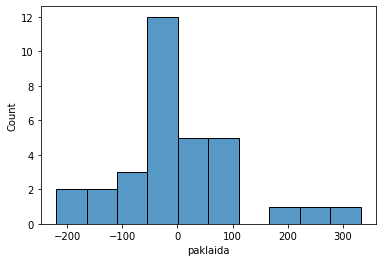

In [122]:
sns.histplot(rezultatas['paklaida'])

In [123]:
su_pavadinimais = pd.concat([fish, rezultatas.set_index('index')], axis=1)
su_pavadinimais[su_pavadinimais['Spejimas'].notna()]

,Species,Weight,Length1,Length2,Length3,Height,Width,Weight,Spejimas,paklaida
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,363.0,450.224121,-87.224121
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594,500.0,500.917931,-0.917931
13,Bream,340.0,29.5,32.0,37.3,13.9129,5.0728,340.0,559.787501,-219.787501
26,Bream,720.0,32.0,35.0,40.6,16.3618,6.0900,720.0,719.194335,0.805665
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515,714.0,762.707979,-48.707979
28,Bream,850.0,32.8,36.0,41.6,16.8896,6.1984,850.0,766.545985,83.454015
31,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920,955.0,863.403119,91.596881
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044,78.0,0.166236,77.833764
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742,120.0,55.583701,64.416299
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544,150.0,146.217761,3.782239


<AxesSubplot:xlabel='Weight', ylabel='Height'>

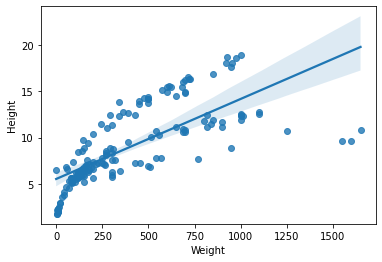

In [124]:
sns.regplot(x="Weight", y="Height", data=fish)

Text(0.5, 1.0, 'Correlation Heatmap')

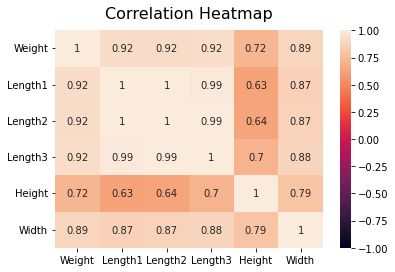

In [125]:
heatmap = sns.heatmap(fish.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)

In [126]:
rezultatas = rezultatas.drop(['index'], axis=1, inplace=True)

In [131]:
rezultatas.head()

,Weight,Spejimas,paklaida
0,120.0,55.583701,64.416299
1,390.0,534.969559,-144.969559
2,12.2,26.481449,-14.281449
3,690.0,727.140783,-37.140783
4,1600.0,1267.950004,332.049996


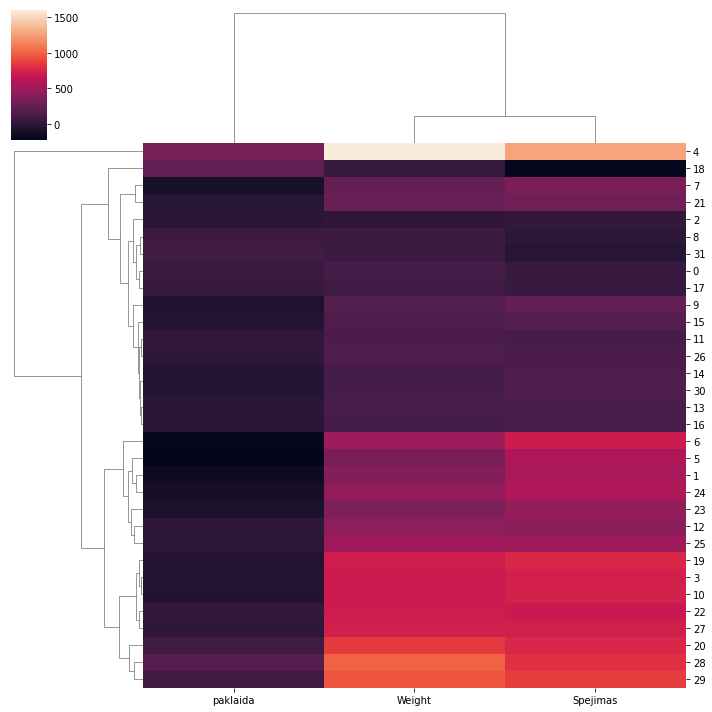

In [130]:
sns.clustermap(rezultatas)